In [1]:
#importamos las librerias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


In [2]:
#Importamos el dataset
dataset = pd.read_csv('Mall_Customers.csv')
#Mostramos las 10 primeras filas
dataset.head(10) 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#total de filas y columnas en el conjunto de datos
dataset.shape

(200, 5)

In [4]:
dataset.info() # no faltan valores ya que todas las columnas tienen 200 entradas correctamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Cálculo de valores faltantes
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
### Selección de funciones para el modelo
#Considerando solo 2 funciones (ingresos anuales y puntaje de gastos) y ninguna etiqueta disponible
X= dataset.iloc[:, [3,4]].values


In [7]:
#Construyendo el modelo
# Algoritmo KMeans para decidir el número de clúster óptimo, KMeans++ utilizando el método del Codo 
#para calcular K para KMeans, usaré el método ELBOW en el cálculo de KMEANS++
from sklearn.cluster import KMeans
wcss=[]

#siempre asumimos que el número máximo de clústeres sería 10
#puedes juzgar el número de grupos haciendo un promedio
###Código estático para obtener el número máximo de clústeres

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ es la fórmula utilizada para segregar los puntos de datos en grupos

C:\Users\e-luisalopez\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


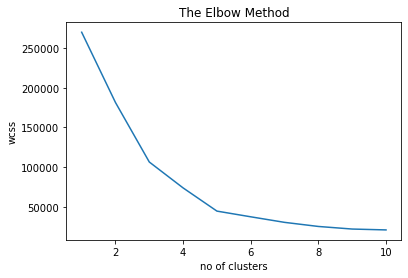

In [8]:
#Visualización del método ELBOW para obtener el valor óptimo de K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
#Si aleja esta curva, verá que el último codo viene en k = 5
#no importa qué rango seleccionemos ex- (1,21) también veré el mismo comportamiento pero si elegimos un rango más alto es un poco difícil visualizar el CODO
#es por eso que generalmente preferimos el rango (1,11)
##Finalmente obtuvimos que k=5

#Construyo el modelo
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#Para el aprendizaje no supervisado usamos "fit_predict()" mientras que para el aprendizaje supervisado usamos "fit_tranform()"
#y_kmeans es el modelo final. Ahora, cómo y dónde implementaremos este modelo en producción depende de la herramienta que estemos usando.
#Este caso de uso es muy común y se usa en la industria de BFS (tarjeta de crédito) y en el comercio minorista para la segmentación de clientes.

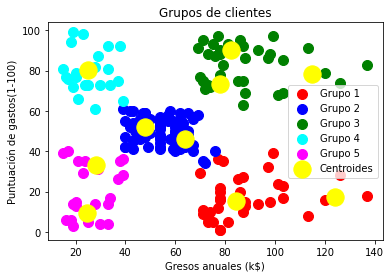

In [10]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Grupo 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Grupo 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Grupo 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Grupos de clientes')
plt.xlabel('Gresos anuales (k$)')
plt.ylabel('Puntuación de gastos(1-100)')
plt.legend()
plt.show()


In [11]:
###Interpretación del modelo
#Grupo 1 (Color rojo) -> gana mucho pero gasta menos
#Grupo 2 (Color Azul) -> promedio en términos de ingresos y gastos
#Grupo 3 (color verde) -> gana mucho y también gasta mucho [FIJAR OBJETIVO]
#Grupo 4 (color cian) -> ganar menos pero gastar más
#Grupo 5 (Color magenta) -> Ganar menos, gastar menos


######Podemos poner el Clúster 3 en algún sistema de alerta donde se les puede enviar un correo electrónico a diario, ya que estos son fáciles de conversar ######
#donde en otros podemos configurar como una vez a la semana o una vez al mes

# Gracias y por favor vota por la motivación